# Import libraries

In [1]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np
from sklearn.feature_selection import RFE


# Import data

In [2]:
file_path = '../train_1.csv'

data = pd.read_csv(file_path)
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


# Data preparation

In [3]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0,
)

X_train.shape, X_test.shape

((16954, 80), (4239, 80))

# Cross-validation on different n of features

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
import time

def evaluate_feature_selection(X_train, y_train, X_test, y_test, list_of_models, feature_range=(20, 81, 10), cv=30):
    results = []
    for n_features in range(*feature_range):
        print(f"Calculating for {n_features} features...")
        regressor = RandomForestRegressor(n_estimators=10, random_state=10)
        sel_ = RFE(estimator=regressor, n_features_to_select=n_features, step=2)
        sel_.fit(X_train, y_train)

        selected_feat = X_train.columns[sel_.get_support()]
        X_train_selected = sel_.transform(X_train)
        X_test_selected = sel_.transform(X_test)

        # Scaling data
        min_max_scaler = MinMaxScaler()
        X_train_sc = min_max_scaler.fit_transform(X_train_selected)
        X_test_sc = min_max_scaler.transform(X_test_selected)

        scaler = MinMaxScaler()
        y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))
        y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

        model_results_list = []

        for model in list_of_models:
            start_time = time.time()

            cv_result = cross_validate(
                estimator=model,
                X=X_train_sc,
                y=y_train_sc.ravel(),
                scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
                cv=cv,
                n_jobs=-1
            )

            end_time = time.time()
            fit_time = np.mean(cv_result['fit_time'])
            score_time = np.mean(cv_result['score_time'])
            mse = -np.mean(cv_result['test_neg_mean_squared_error'])
            mae = -np.mean(cv_result['test_neg_mean_absolute_error'])

            model_results_list.append({
                'Model': type(model).__name__,
                'Num_Selected_Features': n_features,
                'Fit_Time': fit_time,
                'Score_Time': score_time,
                'MSE': mse,
                'MAE': mae
            })

            print(f"Model: {type(model).__name__}, Features: {n_features}, MSE: {mse:.4f}, MAE: {mae:.4f}, "
                  f"Fit Time: {fit_time:.4f} s, Score Time: {score_time:.4f} s, Total Time: {end_time - start_time:.2f} s")

        results.extend(model_results_list)

    return pd.DataFrame(results)

# Define your list of models
list_of_models = [
    RandomForestRegressor(),
    XGBRegressor(),
    KNeighborsRegressor(),
    LGBMRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

# Call the function to evaluate different feature selection and models
evaluation_results = evaluate_feature_selection(X_train, y_train, X_test, y_test, list_of_models, feature_range=(20, 81, 10), cv=30)
print(evaluation_results)

Calculating for 20 features...
Model: RandomForestRegressor, Features: 20, MSE: 0.0027, MAE: 0.0289, Fit Time: 46.9538 s, Score Time: 0.0354 s, Total Time: 189.49 s
Model: XGBRegressor, Features: 20, MSE: 0.0031, MAE: 0.0330, Fit Time: 8.2018 s, Score Time: 0.0038 s, Total Time: 33.63 s
Model: KNeighborsRegressor, Features: 20, MSE: 0.0034, MAE: 0.0326, Fit Time: 0.0041 s, Score Time: 0.0948 s, Total Time: 0.54 s
Model: LGBMRegressor, Features: 20, MSE: 0.0033, MAE: 0.0363, Fit Time: 0.5895 s, Score Time: 0.0067 s, Total Time: 3.17 s
Model: SVR, Features: 20, MSE: 0.0068, MAE: 0.0623, Fit Time: 5.2304 s, Score Time: 0.3473 s, Total Time: 22.49 s
Model: DecisionTreeRegressor, Features: 20, MSE: 0.0044, MAE: 0.0343, Fit Time: 0.4894 s, Score Time: 0.0014 s, Total Time: 2.13 s
Model: GradientBoostingRegressor, Features: 20, MSE: 0.0051, MAE: 0.0491, Fit Time: 16.4721 s, Score Time: 0.0028 s, Total Time: 65.76 s
Calculating for 30 features...
Model: RandomForestRegressor, Features: 30, MSE

# Results

In [34]:
results_df = pd.DataFrame(evaluation_results)


pivot_table = results_df.pivot_table(index=['Num_Selected_Features', 'Model'], values=['MSE', 'MAE'])

pivot_table

MAE       MSE
Num_Selected_Features Model                                        
20                    DecisionTreeRegressor      0.034335  0.004405
                      GradientBoostingRegressor  0.049142  0.005139
                      KNeighborsRegressor        0.032575  0.003399
                      LGBMRegressor              0.036319  0.003316
                      RandomForestRegressor      0.028887  0.002715
                      SVR                        0.062299  0.006792
                      XGBRegressor               0.033024  0.003071
30                    DecisionTreeRegressor      0.033402  0.004088
                      GradientBoostingRegressor  0.047401  0.004834
                      KNeighborsRegressor        0.032269  0.003336
                      LGBMRegressor              0.035769  0.003231
                      RandomForestRegressor      0.028588  0.002677
                      SVR                        0.060947  0.006533
                      XGBRegressor               0.032294  0.002927
40                    DecisionTreeRegressor      0.033921  0.004446
                      GradientBoostingRegressor  0.047136  0.004819
                      KNeighborsRegressor        0.032129  0.003313
                      LGBMRegressor              0.035237  0.003134
                      RandomForestRegressor      0.028552  0.002663
                      SVR                        0.060422  0.006354
                      XGBRegressor               0.032170  0.002940
50                    DecisionTreeRegressor      0.033880  0.004292
                      GradientBoostingRegressor  0.047054  0.004820
                      KNeighborsRegressor        0.032112  0.003316
                      LGBMRegressor              0.034937  0.003101
                      RandomForestRegressor      0.028453  0.002650
                      SVR                        0.060268  0.006355
                      XGBRegressor               0.032094  0.002918
60                    DecisionTreeRegressor      0.033870  0.004372
                      GradientBoostingRegressor  0.046860  0.004770
                      KNeighborsRegressor        0.032231  0.003349
                      LGBMRegressor              0.034721  0.003047
                      RandomForestRegressor      0.028328  0.002632
                      SVR                        0.060165  0.006332
                      XGBRegressor               0.031485  0.002833
70                    DecisionTreeRegressor      0.033895  0.004372
                      GradientBoostingRegressor  0.046836  0.004750
                      KNeighborsRegressor        0.032349  0.003373
                      LGBMRegressor              0.034766  0.003060
                      RandomForestRegressor      0.028282  0.002617
                      SVR                        0.060265  0.006379
                      XGBRegressor               0.031660  0.002868
80                    DecisionTreeRegressor      0.033928  0.004347
                      GradientBoostingRegressor  0.046783  0.004736
                      KNeighborsRegressor        0.032817  0.003501
                      LGBMRegressor              0.034650  0.003048
                      RandomForestRegressor      0.028288  0.002633
                      SVR                        0.060142  0.006337
                      XGBRegressor               0.031716  0.002873

In [11]:
def evaluate_feature_selection_catboost(X_train, y_train, X_test, y_test, list_of_models_2, feature_range=(20, 81, 10), cv=30):
    results = []
    for n_features in range(*feature_range):
        print(f"Calculating for {n_features} features...")
        regressor = RandomForestRegressor(n_estimators=10, random_state=10)
        sel_ = RFE(estimator=regressor, n_features_to_select=n_features, step=2)
        sel_.fit(X_train, y_train)

        selected_feat = X_train.columns[sel_.get_support()]
        X_train_selected = sel_.transform(X_train)
        X_test_selected = sel_.transform(X_test)

        # Scaling data
        min_max_scaler = MinMaxScaler()
        X_train_sc = min_max_scaler.fit_transform(X_train_selected)
        X_test_sc = min_max_scaler.transform(X_test_selected)

        scaler = MinMaxScaler()
        y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))
        y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

        model_results_list = []

        for model in list_of_models_2:
            start_time = time.time()

            cv_result = cross_validate(
                estimator=model,
                X=X_train_sc,
                y=y_train_sc.ravel(),
                scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
                cv=cv,
                n_jobs=-1
            )

            end_time = time.time()
            fit_time = np.mean(cv_result['fit_time'])
            score_time = np.mean(cv_result['score_time'])
            mse = -np.mean(cv_result['test_neg_mean_squared_error'])
            mae = -np.mean(cv_result['test_neg_mean_absolute_error'])

            model_results_list.append({
                'Model': type(model).__name__,
                'Num_Selected_Features': n_features,
                'Fit_Time': fit_time,
                'Score_Time': score_time,
                'MSE': mse,
                'MAE': mae
            })

            print(f"Model: {type(model).__name__}, Features: {n_features}, MSE: {mse:.4f}, MAE: {mae:.4f}, "
                  f"Fit Time: {fit_time:.4f} s, Score Time: {score_time:.4f} s, Total Time: {end_time - start_time:.2f} s")

        results.extend(model_results_list)

    return pd.DataFrame(results)


list_of_models_2 = [
    CatBoostRegressor()  
]

# Call the function to evaluate different feature selection and models
evaluation_results_catboost = evaluate_feature_selection_catboost(X_train, y_train, X_test, y_test, list_of_models_2, feature_range=(20, 81, 10), cv=30)
print(evaluation_results_catboost)

Calculating for 20 features...
Model: CatBoostRegressor, Features: 20, MSE: 0.0030, MAE: 0.0338, Fit Time: 36.0253 s, Score Time: 0.0185 s, Total Time: 145.87 s
Calculating for 30 features...
Model: CatBoostRegressor, Features: 30, MSE: 0.0029, MAE: 0.0331, Fit Time: 47.2126 s, Score Time: 0.0202 s, Total Time: 186.16 s
Calculating for 40 features...
Model: CatBoostRegressor, Features: 40, MSE: 0.0029, MAE: 0.0329, Fit Time: 58.4101 s, Score Time: 0.0242 s, Total Time: 230.75 s
Calculating for 50 features...
Model: CatBoostRegressor, Features: 50, MSE: 0.0028, MAE: 0.0324, Fit Time: 51.6759 s, Score Time: 0.0224 s, Total Time: 204.09 s
Calculating for 60 features...
Model: CatBoostRegressor, Features: 60, MSE: 0.0028, MAE: 0.0323, Fit Time: 56.8925 s, Score Time: 0.0288 s, Total Time: 225.13 s
Calculating for 70 features...
Model: CatBoostRegressor, Features: 70, MSE: 0.0028, MAE: 0.0323, Fit Time: 64.7362 s, Score Time: 0.0339 s, Total Time: 256.29 s
Calculating for 80 features...
Mod

In [15]:
evaluation_results_df = pd.DataFrame(evaluation_results_catboost)

# Display the new DataFrame
evaluation_results_df

,Model,Num_Selected_Features,Fit_Time,Score_Time,MSE,MAE
0,CatBoostRegressor,20,36.025302,0.018493,0.002992,0.033784
1,CatBoostRegressor,30,47.212569,0.020235,0.002901,0.033088
2,CatBoostRegressor,40,58.410128,0.024190,0.002882,0.032910
3,CatBoostRegressor,50,51.675947,0.022385,0.002818,0.032420
4,CatBoostRegressor,60,56.892538,0.028784,0.002794,0.032297
5,CatBoostRegressor,70,64.736207,0.033927,0.002785,0.032331
6,CatBoostRegressor,80,71.766370,0.040557,0.002781,0.032242


# Recursive Feature Elimination 70

In [5]:
regressor = RandomForestRegressor(n_estimators=10, random_state=10)

sel_ = RFE(estimator=regressor, n_features_to_select=70, step=2)

# Fit the RFE on the training data
sel_.fit(X_train, y_train)

# Capture the names of the selected features
selected_feat = X_train.columns[(sel_.get_support())]

# Display the selected features
print(selected_feat)

# Remove the features from the training and testing sets
X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)

Index(['wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass',
       'entropy_atomic_mass', 'wtd_entropy_atomic_mass',
       'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass',
       'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie',
       'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'wtd_entropy_ElectronAffinity', 'range_ElectronAffinit

In [6]:
X_train_selected.shape, X_test_selected.shape

((16954, 70), (4239, 70))

# Scaling

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_selected)

X_test_sc=min_max_scaler.fit_transform(X_test_selected)

In [8]:
scaler = MinMaxScaler()


y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))


y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

# Baseline model

In [9]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor

In [10]:
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)

In [11]:
def report_metrics(model, X_train_sc, X_test_sc, y_train_sc, y_test_sc, label):
    print(f'Train MAE ({label}):', round(mae(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test MAE ({label}) :', round(mae(y_test_sc, model.predict(X_test_sc)), 4), '\n')

    print(f'Train R^2 ({label}):', round(r2(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test R^2 ({label}) :', round(r2(y_test_sc, model.predict(X_test_sc)), 4), '\n')

In [72]:
LR_baseline = LinearRegression().fit(X_train_sc, y_train_sc)
report_metrics(LR_baseline, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'LR_baseline')

Train MAE (LR_baseline): 0.0729
Test MAE (LR_baseline) : 0.0814 

Train R^2 (LR_baseline): 0.7311
Test R^2 (LR_baseline) : 0.6559 



# RandomForestRegressor

In [43]:
model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_1.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_1 = model_1.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_1)
mae = mean_absolute_error(y_test_sc, y_pred_1)
r2 = r2_score(y_test_sc, y_pred_1)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_1)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

C:\Users\Margarita\AppData\Local\Temp\ipykernel_15224\1833622144.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(X_train_sc, y_train_sc)


Mean Squared Error (MSE): 0.006814387300174946
Mean Absolute Error (MAE): 0.05717732172882614
R-squared (R2): 0.8022731650011454
mape: 10.084743100376302


# XGBRegressor

In [44]:
model_2 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_2.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_2 = model_2.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2)
mae = mean_absolute_error(y_test_sc, y_pred_2)
r2 = r2_score(y_test_sc, y_pred_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.006247933201765543
Mean Absolute Error (MAE): 0.053669823730134195
R-squared (R2): 0.8187094447599648
mape: 8.089478873024616


# XGBRegressor hyperparameters¶

In [17]:
import skopt
from skopt import gp_minimize
from skopt.space import Real, Integer,Categorical
from skopt import BayesSearchCV


#### n_iter=50; cv=10 

In [20]:
param_space = {
    'eta': Real(0.001, 1.0, 'log-uniform'),
    'gamma': Real(0.001, 1.0, 'log-uniform'),
    'max_depth': Integer(2, 15),
    'min_child_weight': Integer(1, 10),
    'max_delta_step': Real(0.001, 10.0, 'log-uniform'),
    'lambda': Real(0.001, 10.0, 'log-uniform'),
    'alpha': Real(0.001, 10.0, 'log-uniform'),
    'tree_method': (['hist', 'exact']),  # Only CPU-based tree methods
    'learning_rate': Real(0.001, 1.0, 'log-uniform'),    
    'max_leaves': Integer(2, 256)
}

model = XGBRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50, # Number of iterations for optimization
    scoring='neg_mean_squared_error',
    cv=10, # Number of cross-validation folds
    n_jobs=-1, # Use all available CPU cores
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MAPE score:", -search.best_score_)

Best hyperparameters: OrderedDict([('alpha', 0.1209709684360764), ('eta', 0.005192972539206162), ('gamma', 0.0010447001679767779), ('lambda', 0.3553844031838776), ('learning_rate', 0.2167676866814831), ('max_delta_step', 0.23833540244271156), ('max_depth', 15), ('max_leaves', 217), ('min_child_weight', 7), ('tree_method', 'exact')])
Best MAPE score: 0.002770782993148569


In [45]:
model_2_tun= XGBRegressor(random_state=42, alpha= 0.1209709684360764, eta =  0.005192972539206162, gamma =  0.0010447001679767779,
                    reg_lambda=0.3553844031838776, learning_rate=0.2167676866814831,
                    max_delta_step =0.23833540244271156,max_depth =15,max_leaves=217, 
                    min_child_weight= 7 , tree_method='exact' )
model_2_tun.fit(X_train_sc, y_train_sc)
y_pred_2_tun = model_2_tun.predict(X_test_sc)
mse = mean_squared_error(y_test_sc, y_pred_2_tun)
mae = mean_absolute_error(y_test_sc, y_pred_2_tun)
r2 = r2_score(y_test_sc, y_pred_2_tun)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.006591910245989739
Mean Absolute Error (MAE): 0.054681201808774976
R-squared (R2): 0.8087285779159323
mape: 9.110140097454709


#### n_iter=50; cv=10 

In [24]:
param_space = {
    'eta': Real(0.0001, 1.0, 'log-uniform'),              
    'gamma': Real(0.0001, 1.0, 'log-uniform'),            
    'max_depth': Integer(2, 20),                         
    'min_child_weight': Integer(1, 20),                  
    'max_delta_step': Real(0.0001, 10.0, 'log-uniform'),  
    'lambda': Real(0.0001, 100.0, 'log-uniform'),        
    'alpha': Real(0.0001, 100.0, 'log-uniform'),         
    'tree_method': (['hist', 'exact']),  # Only CPU-based tree methods
    'learning_rate': Real(0.0001, 1.0, 'log-uniform'),  
    'max_leaves': Integer(2, 500)                     
}

model = XGBRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50, # Number of iterations for optimization
    scoring='neg_mean_squared_error',
    cv=10, # Number of cross-validation folds
    n_jobs=-1, # Use all available CPU cores
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MAPE score:", -search.best_score_)

Best hyperparameters: OrderedDict([('alpha', 0.0001), ('eta', 0.0004284192707384294), ('gamma', 0.0001), ('lambda', 0.0001), ('learning_rate', 0.03630376409281886), ('max_delta_step', 0.5834444923898522), ('max_depth', 20), ('max_leaves', 2), ('min_child_weight', 15), ('tree_method', 'exact')])
Best MAPE score: 0.002786368971626209


In [46]:
model_2_tun_2= XGBRegressor(random_state=42, alpha= 0.0001, eta =  0.0004284192707384294, gamma =  0.0001,
                    reg_lambda=0.0001, learning_rate=0.03630376409281886,
                    max_delta_step =0.5834444923898522,max_depth =20,max_leaves=2, 
                    min_child_weight= 15 , tree_method='exact' )
model_2_tun_2.fit(X_train_sc, y_train_sc)
y_pred_2_tun_2 = model_2_tun_2.predict(X_test_sc)
mse = mean_squared_error(y_test_sc, y_pred_2_tun_2)
mae = mean_absolute_error(y_test_sc, y_pred_2_tun_2)
r2 = r2_score(y_test_sc, y_pred_2_tun_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.006361210918813211
Mean Absolute Error (MAE): 0.05598711783904655
R-squared (R2): 0.8154225689953372
mape: 9.16055491048019


In [73]:
param_space = {
    'eta': Real(0.0001, 1.0, 'log-uniform'),              
    'gamma': Real(0.0001, 1.0, 'log-uniform'),            
    'max_depth': Integer(2, 20),                         
    'min_child_weight': Integer(1, 20),                  
    'max_delta_step': Real(0.0001, 10.0, 'log-uniform'),  
    'lambda': Real(0.0001, 100.0, 'log-uniform'),        
    'alpha': Real(0.0001, 100.0, 'log-uniform'),         
    'tree_method': (['hist', 'exact']),  # Only CPU-based tree methods
    'learning_rate': Real(0.0001, 1.0, 'log-uniform'),  
    'max_leaves': Integer(2, 500)                     
}

model = XGBRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=200, # Number of iterations for optimization
    scoring='neg_mean_squared_error',
    cv=10, # Number of cross-validation folds
    n_jobs=-1, # Use all available CPU cores
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MAPE score:", -search.best_score_)

Best hyperparameters: OrderedDict([('alpha', 0.0001), ('eta', 0.0001649704445171943), ('gamma', 0.0001), ('lambda', 12.427159004657582), ('learning_rate', 0.11512231179039732), ('max_delta_step', 0.2723963669375304), ('max_depth', 20), ('max_leaves', 2), ('min_child_weight', 20), ('tree_method', 'exact')])
Best MAPE score: 0.0026350103547347304


In [74]:
model_2_tun_2= XGBRegressor(random_state=42, alpha= 0.0001, eta =  0.0001649704445171943, gamma =  0.0001,
                    reg_lambda=12.427159004657582, learning_rate=0.11512231179039732,
                    max_delta_step =0.2723963669375304,max_depth =20,max_leaves=2, 
                    min_child_weight= 20 , tree_method='exact' )
model_2_tun_3.fit(X_train_sc, y_train_sc)
y_pred_2_tun_3 = model_2_tun_3.predict(X_test_sc)
mse = mean_squared_error(y_test_sc, y_pred_2_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_2_tun_3)
r2 = r2_score(y_test_sc, y_pred_2_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.007429464063964003
Mean Absolute Error (MAE): 0.05876479409201376
R-squared (R2): 0.7844260458944539
mape: 7.069508921545689


### hyperopt tuning

In [53]:
import numpy as np
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from tqdm import tqdm  # Import tqdm for the progress bar

# Define the search space for hyperparameters
param_space = {
    'eta': hp.loguniform('eta', np.log(0.001), np.log(1.0)),
    'gamma': hp.loguniform('gamma', np.log(0.001), np.log(1.0)),
    'max_depth': hp.quniform('max_depth', 2, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'max_delta_step': hp.loguniform('max_delta_step', np.log(0.001), np.log(10.0)),
    'lambda': hp.loguniform('lambda', np.log(0.001), np.log(10.0)),
    'alpha': hp.loguniform('alpha', np.log(0.001), np.log(10.0)),
    'tree_method': hp.choice('tree_method', ['hist', 'exact']),  # Only CPU-based tree methods
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1.0)),
}

# Define the objective function to minimize (negative mean squared error)
def objective(params):
    params['max_depth'] = int(params['max_depth'])  # Convert max_depth to an integer
    model = XGBRegressor(random_state=42, **params)
    mse_scores = -cross_val_score(model, X_train_sc, y_train_sc, scoring='neg_mean_squared_error', cv=5)
    return {'loss': mse_scores.mean(), 'status': STATUS_OK}

# Initialize Trials to keep track of results
trials = Trials()

# Define the number of iterations for optimization
num_iterations = 100

# Run the hyperparameter optimization with a progress bar
best = []
for _ in tqdm(range(num_iterations), desc='Hyperparameter Tuning', unit='iter'):
    best = fmin(
        fn=objective,
        space=param_space,
        algo=tpe.suggest,
        max_evals=len(trials.trials) + 1,  # Incremental evaluations
        trials=trials,
        verbose=0
    )

# Get the best hyperparameters and corresponding MSE score
best_params = {param: value for param, value in best.items()}
best_mse = min([trial['result']['loss'] for trial in trials.trials])

print("Best hyperparameters:", best_params)
print("Best MSE score:", best_mse)

Hyperparameter Tuning: 100%|███████████████████████████████████████████████████████| 100/100 [29:35<00:00, 17.75s/iter]

Best hyperparameters: {'alpha': 0.013782341736430965, 'eta': 0.1647259890453326, 'gamma': 0.0010154437456889867, 'lambda': 0.030266927665412544, 'learning_rate': 0.05501517286182426, 'max_delta_step': 1.6631973928288686, 'max_depth': 11.0, 'min_child_weight': 9.0, 'tree_method': 0}
Best MSE score: 0.0027708274092141374


In [55]:
model_2_tun_3= XGBRegressor(random_state=42, alpha= 0.013782341736430965, eta =  0.1647259890453326, gamma =  0.0010154437456889867,
                    reg_lambda=0.030266927665412544, learning_rate=0.05501517286182426,
                    max_delta_step =1.6631973928288686,max_depth =11,max_leaves=2, 
                    min_child_weight= 9.0)
model_2_tun_3.fit(X_train_sc, y_train_sc)
y_pred_2_tun_3 = model_2_tun_3.predict(X_test_sc)
mse = mean_squared_error(y_test_sc, y_pred_2_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_2_tun_3)
r2 = r2_score(y_test_sc, y_pred_2_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.007429464063964003
Mean Absolute Error (MAE): 0.05876479409201376
R-squared (R2): 0.7844260458944539
mape: 7.069508921545689


In [75]:
param_space = {
    'eta': hp.loguniform('eta', np.log(0.001), np.log(1.0)),
    'gamma': hp.loguniform('gamma', np.log(0.001), np.log(1.0)),
    'max_depth': hp.quniform('max_depth', 2, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'max_delta_step': hp.loguniform('max_delta_step', np.log(0.001), np.log(10.0)),
    'lambda': hp.loguniform('lambda', np.log(0.001), np.log(10.0)),
    'alpha': hp.loguniform('alpha', np.log(0.001), np.log(10.0)),
    'tree_method': hp.choice('tree_method', ['hist', 'exact']),  # Only CPU-based tree methods
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1.0)),
}

# Define the objective function to minimize (negative mean squared error)
def objective(params):
    params['max_depth'] = int(params['max_depth'])  # Convert max_depth to an integer
    model = XGBRegressor(random_state=42, **params)
    mse_scores = -cross_val_score(model, X_train_sc, y_train_sc, scoring='neg_mean_squared_error', cv=5)
    return {'loss': mse_scores.mean(), 'status': STATUS_OK}

# Initialize Trials to keep track of results
trials = Trials()

# Define the number of iterations for optimization
num_iterations = 50

# Run the hyperparameter optimization with a progress bar
best = []
for _ in tqdm(range(num_iterations), desc='Hyperparameter Tuning', unit='iter'):
    best = fmin(
        fn=objective,
        space=param_space,
        algo=tpe.suggest,
        max_evals=len(trials.trials) + 1,  # Incremental evaluations
        trials=trials,
        verbose=0
    )

# Get the best hyperparameters and corresponding MSE score
best_params = {param: value for param, value in best.items()}
best_mse = min([trial['result']['loss'] for trial in trials.trials])

print("Best hyperparameters:", best_params)
print("Best MSE score:", best_mse)

Hyperparameter Tuning: 100%|█████████████████████████████████████████████████████████| 50/50 [17:43<00:00, 21.26s/iter]

Best hyperparameters: {'alpha': 0.19215282888889643, 'eta': 0.0010177121850251526, 'gamma': 0.0014813093176159883, 'lambda': 0.6476632329708731, 'learning_rate': 0.08098097664690362, 'max_delta_step': 0.5696850070132605, 'max_depth': 13.0, 'min_child_weight': 10.0, 'tree_method': 0}
Best MSE score: 0.0027772517184767253


In [76]:
model_2_tun_4= XGBRegressor(random_state=42, alpha= 0.19215282888889643, eta =  0.0010177121850251526, gamma =  0.0014813093176159883,
                    reg_lambda=0.6476632329708731, learning_rate=0.08098097664690362,
                    max_delta_step =0.5696850070132605,max_depth =13,
                    min_child_weight= 10.0, tree_method='hist')
model_2_tun_4.fit(X_train_sc, y_train_sc)
y_pred_2_tun_4 = model_2_tun_4.predict(X_test_sc)
mse = mean_squared_error(y_test_sc, y_pred_2_tun_4)
mae = mean_absolute_error(y_test_sc, y_pred_2_tun_4)
r2 = r2_score(y_test_sc, y_pred_2_tun_4)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun_4)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.0060344143403091455
Mean Absolute Error (MAE): 0.052266283741604476
R-squared (R2): 0.8249049260011394
mape: 9.519248487179764


# CatBoostRegressor

In [56]:
model_3 = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, random_seed=42)


model_3.fit(X_train_sc, y_train_sc, verbose=50)


y_pred_3 = model_3.predict(X_test_sc)

mse = mean_squared_error(y_test_sc, y_pred_3)
mae = mean_absolute_error(y_test_sc, y_pred_3)
r2 = r2_score(y_test_sc, y_pred_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1715065	total: 10.8ms	remaining: 2.15s
50:	learn: 0.0684019	total: 466ms	remaining: 1.36s
100:	learn: 0.0613064	total: 938ms	remaining: 919ms
150:	learn: 0.0563042	total: 1.38s	remaining: 449ms
199:	learn: 0.0527994	total: 1.81s	remaining: 0us
Mean Squared Error (MSE): 0.005783304488017601
Mean Absolute Error (MAE): 0.05141948846319181
R-squared (R2): 0.8321911505938275
mape: 10.874086919804714


In [79]:
from hyperopt import space_eval

In [80]:
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'depth': hp.choice('depth', [2, 4, 6, 8, 10]),
    'iterations': hp.choice('iterations', [50, 100, 200, 400, 800]),
    'model_size_reg': hp.uniform('model_size_reg', 0, 1),
    'boosting_type': hp.choice('boosting_type', ['Ordered', 'Plain']),
    'reg_lambda': hp.loguniform('reg_lambda', -9, 2),
    'max_bin': hp.choice('max_bin', [8, 16, 32, 64, 128]),
    'min_child_samples': hp.choice('min_child_samples', [2, 5, 10, 15, 20])
}

# define the objective function to minimize (negative mean squared error)
def objective(params):
    model = CatBoostRegressor(
        learning_rate=params['learning_rate'],
        depth=params['depth'],
        iterations=params['iterations'],
        model_size_reg=params['model_size_reg'],
        boosting_type=params['boosting_type'],
        reg_lambda=params['reg_lambda'],
        max_bin=params['max_bin'],
        min_child_samples=params['min_child_samples'],
        silent=True,
        random_state=42
    )
    scores = -cross_val_score(model, X_train_sc, y_train_sc, cv=5, scoring='neg_mean_squared_error')
    score = np.mean(scores)
    return score

# set up the hyperparameter tuning using the Tree-structured Parzen Estimator (TPE) algorithm
trials = Trials()
random_state= np.random.default_rng(seed=42)
#random_state = np.random.RandomState(seed=42)
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials,
            rstate=random_state)
           
# print the best hyperparameters and the corresponding mean cross-validation score

best_params = space_eval(space, best)
model_3_tun = CatBoostRegressor(**best_params, silent=True, random_state=42)
model_3_tun.fit(X_train_sc, y_train_sc)
y_pred_3_tun_3 = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_3)
r2 = r2_score(y_test_sc, y_pred_3_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_3)
print("Best hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

100%|██████████████████████████████████████████| 50/50 [1:27:38<00:00, 105.17s/trial, best loss: 0.0026603621243455064]
Best hyperparameters: {'boosting_type': 'Plain', 'depth': 10, 'iterations': 800, 'learning_rate': 0.05676018683562937, 'max_bin': 64, 'min_child_samples': 10, 'model_size_reg': 0.26045021850117894, 'reg_lambda': 0.013200778721169428}
Mean Squared Error (MSE): 0.0067288885982524985
Mean Absolute Error (MAE): 0.05503423207426856
R-squared (R2): 0.804754002526656
mape: 7.740230533895297


In [81]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Define the hyperparameter search space
param_space = {
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'depth': Integer(3, 10),
    'l2_leaf_reg': Real(1.0, 10.0, 'log-uniform'),
    'border_count': Integer(1, 100),
    'bagging_temperature': Real(0.1, 0.9),
    'min_data_in_leaf': Integer(5, 50),
    'grow_policy': Categorical(['SymmetricTree', 'Depthwise', 'Lossguide']),
}

# Create the CatBoostRegressor model
model = CatBoostRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50, 
    scoring='neg_mean_squared_error',
    cv=5, 
    n_jobs=-1, 
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

0:	learn: 0.1786103	total: 44.2ms	remaining: 44.2s
1:	learn: 0.1722290	total: 75.3ms	remaining: 37.6s
2:	learn: 0.1664571	total: 104ms	remaining: 34.5s
3:	learn: 0.1609097	total: 135ms	remaining: 33.5s
4:	learn: 0.1558095	total: 162ms	remaining: 32.2s
5:	learn: 0.1507050	total: 193ms	remaining: 32s
6:	learn: 0.1460138	total: 225ms	remaining: 31.9s
7:	learn: 0.1415426	total: 262ms	remaining: 32.5s
8:	learn: 0.1371902	total: 298ms	remaining: 32.9s
9:	learn: 0.1330422	total: 333ms	remaining: 32.9s
10:	learn: 0.1292176	total: 365ms	remaining: 32.8s
11:	learn: 0.1252711	total: 396ms	remaining: 32.6s
12:	learn: 0.1217261	total: 429ms	remaining: 32.5s
13:	learn: 0.1183873	total: 462ms	remaining: 32.5s
14:	learn: 0.1152387	total: 493ms	remaining: 32.4s
15:	learn: 0.1122707	total: 522ms	remaining: 32.1s
16:	learn: 0.1093268	total: 550ms	remaining: 31.8s
17:	learn: 0.1065592	total: 580ms	remaining: 31.6s
18:	learn: 0.1037757	total: 613ms	remaining: 31.7s
19:	learn: 0.1013119	total: 645ms	remaini

166:	learn: 0.0454287	total: 5.44s	remaining: 27.1s
167:	learn: 0.0453358	total: 5.47s	remaining: 27.1s
168:	learn: 0.0452754	total: 5.5s	remaining: 27s
169:	learn: 0.0452086	total: 5.53s	remaining: 27s
170:	learn: 0.0451453	total: 5.56s	remaining: 26.9s
171:	learn: 0.0450767	total: 5.59s	remaining: 26.9s
172:	learn: 0.0450242	total: 5.61s	remaining: 26.8s
173:	learn: 0.0449626	total: 5.64s	remaining: 26.8s
174:	learn: 0.0448719	total: 5.67s	remaining: 26.8s
175:	learn: 0.0448045	total: 5.7s	remaining: 26.7s
176:	learn: 0.0447443	total: 5.73s	remaining: 26.7s
177:	learn: 0.0446598	total: 5.76s	remaining: 26.6s
178:	learn: 0.0445830	total: 5.8s	remaining: 26.6s
179:	learn: 0.0445544	total: 5.82s	remaining: 26.5s
180:	learn: 0.0444621	total: 5.85s	remaining: 26.5s
181:	learn: 0.0443939	total: 5.88s	remaining: 26.4s
182:	learn: 0.0443321	total: 5.92s	remaining: 26.4s
183:	learn: 0.0442644	total: 5.95s	remaining: 26.4s
184:	learn: 0.0442116	total: 5.97s	remaining: 26.3s
185:	learn: 0.04418

326:	learn: 0.0379822	total: 9.55s	remaining: 19.7s
327:	learn: 0.0379642	total: 9.57s	remaining: 19.6s
328:	learn: 0.0379217	total: 9.6s	remaining: 19.6s
329:	learn: 0.0378501	total: 9.63s	remaining: 19.6s
330:	learn: 0.0378206	total: 9.65s	remaining: 19.5s
331:	learn: 0.0377691	total: 9.68s	remaining: 19.5s
332:	learn: 0.0377598	total: 9.7s	remaining: 19.4s
333:	learn: 0.0377417	total: 9.72s	remaining: 19.4s
334:	learn: 0.0377231	total: 9.74s	remaining: 19.3s
335:	learn: 0.0377149	total: 9.76s	remaining: 19.3s
336:	learn: 0.0376912	total: 9.78s	remaining: 19.2s
337:	learn: 0.0376576	total: 9.81s	remaining: 19.2s
338:	learn: 0.0376393	total: 9.82s	remaining: 19.2s
339:	learn: 0.0376219	total: 9.84s	remaining: 19.1s
340:	learn: 0.0376101	total: 9.87s	remaining: 19.1s
341:	learn: 0.0375849	total: 9.9s	remaining: 19.1s
342:	learn: 0.0375563	total: 9.92s	remaining: 19s
343:	learn: 0.0375027	total: 9.95s	remaining: 19s
344:	learn: 0.0374783	total: 9.97s	remaining: 18.9s
345:	learn: 0.03745

491:	learn: 0.0338181	total: 13.5s	remaining: 14s
492:	learn: 0.0337962	total: 13.5s	remaining: 13.9s
493:	learn: 0.0337831	total: 13.6s	remaining: 13.9s
494:	learn: 0.0337751	total: 13.6s	remaining: 13.8s
495:	learn: 0.0337605	total: 13.6s	remaining: 13.8s
496:	learn: 0.0337531	total: 13.6s	remaining: 13.8s
497:	learn: 0.0337339	total: 13.6s	remaining: 13.7s
498:	learn: 0.0337268	total: 13.6s	remaining: 13.7s
499:	learn: 0.0337231	total: 13.7s	remaining: 13.7s
500:	learn: 0.0337069	total: 13.7s	remaining: 13.6s
501:	learn: 0.0336985	total: 13.7s	remaining: 13.6s
502:	learn: 0.0336797	total: 13.7s	remaining: 13.6s
503:	learn: 0.0336343	total: 13.8s	remaining: 13.6s
504:	learn: 0.0336099	total: 13.8s	remaining: 13.5s
505:	learn: 0.0336073	total: 13.8s	remaining: 13.5s
506:	learn: 0.0336003	total: 13.8s	remaining: 13.4s
507:	learn: 0.0335897	total: 13.9s	remaining: 13.4s
508:	learn: 0.0335660	total: 13.9s	remaining: 13.4s
509:	learn: 0.0335463	total: 13.9s	remaining: 13.4s
510:	learn: 0.

658:	learn: 0.0314659	total: 17.2s	remaining: 8.89s
659:	learn: 0.0314415	total: 17.2s	remaining: 8.87s
660:	learn: 0.0314302	total: 17.2s	remaining: 8.84s
661:	learn: 0.0314247	total: 17.3s	remaining: 8.81s
662:	learn: 0.0314152	total: 17.3s	remaining: 8.78s
663:	learn: 0.0314005	total: 17.3s	remaining: 8.75s
664:	learn: 0.0313849	total: 17.3s	remaining: 8.72s
665:	learn: 0.0313405	total: 17.3s	remaining: 8.7s
666:	learn: 0.0313329	total: 17.4s	remaining: 8.67s
667:	learn: 0.0313242	total: 17.4s	remaining: 8.64s
668:	learn: 0.0313123	total: 17.4s	remaining: 8.61s
669:	learn: 0.0312887	total: 17.4s	remaining: 8.59s
670:	learn: 0.0312802	total: 17.5s	remaining: 8.56s
671:	learn: 0.0312713	total: 17.5s	remaining: 8.53s
672:	learn: 0.0312511	total: 17.5s	remaining: 8.51s
673:	learn: 0.0312433	total: 17.5s	remaining: 8.48s
674:	learn: 0.0312355	total: 17.6s	remaining: 8.46s
675:	learn: 0.0312115	total: 17.6s	remaining: 8.43s
676:	learn: 0.0311839	total: 17.6s	remaining: 8.41s
677:	learn: 0

818:	learn: 0.0297366	total: 20.6s	remaining: 4.56s
819:	learn: 0.0297305	total: 20.7s	remaining: 4.54s
820:	learn: 0.0297106	total: 20.7s	remaining: 4.51s
821:	learn: 0.0296973	total: 20.7s	remaining: 4.48s
822:	learn: 0.0296914	total: 20.7s	remaining: 4.46s
823:	learn: 0.0296897	total: 20.7s	remaining: 4.43s
824:	learn: 0.0296761	total: 20.8s	remaining: 4.41s
825:	learn: 0.0296683	total: 20.8s	remaining: 4.38s
826:	learn: 0.0296606	total: 20.8s	remaining: 4.36s
827:	learn: 0.0296470	total: 20.8s	remaining: 4.33s
828:	learn: 0.0296428	total: 20.9s	remaining: 4.3s
829:	learn: 0.0296249	total: 20.9s	remaining: 4.28s
830:	learn: 0.0296184	total: 20.9s	remaining: 4.25s
831:	learn: 0.0296114	total: 20.9s	remaining: 4.23s
832:	learn: 0.0296055	total: 20.9s	remaining: 4.2s
833:	learn: 0.0295992	total: 21s	remaining: 4.17s
834:	learn: 0.0295959	total: 21s	remaining: 4.15s
835:	learn: 0.0295933	total: 21s	remaining: 4.12s
836:	learn: 0.0295887	total: 21s	remaining: 4.09s
837:	learn: 0.0295824	

980:	learn: 0.0284896	total: 24.2s	remaining: 468ms
981:	learn: 0.0284879	total: 24.2s	remaining: 444ms
982:	learn: 0.0284813	total: 24.2s	remaining: 419ms
983:	learn: 0.0284672	total: 24.2s	remaining: 394ms
984:	learn: 0.0284593	total: 24.3s	remaining: 370ms
985:	learn: 0.0284532	total: 24.3s	remaining: 345ms
986:	learn: 0.0284505	total: 24.3s	remaining: 320ms
987:	learn: 0.0284465	total: 24.3s	remaining: 295ms
988:	learn: 0.0284421	total: 24.3s	remaining: 271ms
989:	learn: 0.0284374	total: 24.4s	remaining: 246ms
990:	learn: 0.0284338	total: 24.4s	remaining: 221ms
991:	learn: 0.0284284	total: 24.4s	remaining: 197ms
992:	learn: 0.0284207	total: 24.4s	remaining: 172ms
993:	learn: 0.0284063	total: 24.5s	remaining: 148ms
994:	learn: 0.0283898	total: 24.5s	remaining: 123ms
995:	learn: 0.0283801	total: 24.5s	remaining: 98.4ms
996:	learn: 0.0283723	total: 24.5s	remaining: 73.8ms
997:	learn: 0.0283699	total: 24.5s	remaining: 49.2ms
998:	learn: 0.0283588	total: 24.6s	remaining: 24.6ms
999:	lea

In [12]:
best_hyperparameters = {
    'bagging_temperature': 0.4341287190826867,
    'border_count': 100,
    'depth': 8,
    'grow_policy': 'Depthwise',
    'l2_leaf_reg': 2.547140142642851,
    'learning_rate': 0.0460231598008572,
    'min_data_in_leaf': 5,
}


model_3_tun = CatBoostRegressor(
    bagging_temperature=best_hyperparameters['bagging_temperature'],
    border_count=best_hyperparameters['border_count'],
    depth=best_hyperparameters['depth'],
    grow_policy=best_hyperparameters['grow_policy'],
    l2_leaf_reg=best_hyperparameters['l2_leaf_reg'],
    learning_rate=best_hyperparameters['learning_rate'],
    min_data_in_leaf=best_hyperparameters['min_data_in_leaf'],
    random_state=42  
)


model_3_tun.fit(X_train_sc, y_train_sc)


y_pred_3_tun = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun)
r2 = r2_score(y_test_sc, y_pred_3_tun)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1786103	total: 206ms	remaining: 3m 25s
1:	learn: 0.1722290	total: 267ms	remaining: 2m 13s
2:	learn: 0.1664571	total: 306ms	remaining: 1m 41s
3:	learn: 0.1609097	total: 336ms	remaining: 1m 23s
4:	learn: 0.1558095	total: 362ms	remaining: 1m 12s
5:	learn: 0.1507050	total: 393ms	remaining: 1m 5s
6:	learn: 0.1460138	total: 422ms	remaining: 59.9s
7:	learn: 0.1415426	total: 453ms	remaining: 56.1s
8:	learn: 0.1371902	total: 484ms	remaining: 53.3s
9:	learn: 0.1330422	total: 516ms	remaining: 51.1s
10:	learn: 0.1292176	total: 548ms	remaining: 49.3s
11:	learn: 0.1252711	total: 578ms	remaining: 47.6s
12:	learn: 0.1217261	total: 611ms	remaining: 46.4s
13:	learn: 0.1183873	total: 646ms	remaining: 45.5s
14:	learn: 0.1152387	total: 677ms	remaining: 44.4s
15:	learn: 0.1122707	total: 705ms	remaining: 43.4s
16:	learn: 0.1093268	total: 732ms	remaining: 42.3s
17:	learn: 0.1065592	total: 761ms	remaining: 41.5s
18:	learn: 0.1037757	total: 794ms	remaining: 41s
19:	learn: 0.1013119	total: 827ms	rema

168:	learn: 0.0452754	total: 5.06s	remaining: 24.9s
169:	learn: 0.0452086	total: 5.09s	remaining: 24.8s
170:	learn: 0.0451453	total: 5.11s	remaining: 24.8s
171:	learn: 0.0450767	total: 5.14s	remaining: 24.8s
172:	learn: 0.0450242	total: 5.16s	remaining: 24.7s
173:	learn: 0.0449626	total: 5.18s	remaining: 24.6s
174:	learn: 0.0448719	total: 5.21s	remaining: 24.6s
175:	learn: 0.0448045	total: 5.24s	remaining: 24.5s
176:	learn: 0.0447443	total: 5.26s	remaining: 24.5s
177:	learn: 0.0446598	total: 5.29s	remaining: 24.4s
178:	learn: 0.0445830	total: 5.32s	remaining: 24.4s
179:	learn: 0.0445544	total: 5.33s	remaining: 24.3s
180:	learn: 0.0444621	total: 5.36s	remaining: 24.3s
181:	learn: 0.0443939	total: 5.39s	remaining: 24.2s
182:	learn: 0.0443321	total: 5.42s	remaining: 24.2s
183:	learn: 0.0442644	total: 5.44s	remaining: 24.1s
184:	learn: 0.0442116	total: 5.47s	remaining: 24.1s
185:	learn: 0.0441857	total: 5.49s	remaining: 24s
186:	learn: 0.0441375	total: 5.51s	remaining: 24s
187:	learn: 0.04

331:	learn: 0.0377691	total: 8.58s	remaining: 17.3s
332:	learn: 0.0377598	total: 8.59s	remaining: 17.2s
333:	learn: 0.0377417	total: 8.61s	remaining: 17.2s
334:	learn: 0.0377231	total: 8.63s	remaining: 17.1s
335:	learn: 0.0377149	total: 8.64s	remaining: 17.1s
336:	learn: 0.0376912	total: 8.66s	remaining: 17s
337:	learn: 0.0376576	total: 8.68s	remaining: 17s
338:	learn: 0.0376393	total: 8.7s	remaining: 17s
339:	learn: 0.0376219	total: 8.71s	remaining: 16.9s
340:	learn: 0.0376101	total: 8.74s	remaining: 16.9s
341:	learn: 0.0375849	total: 8.76s	remaining: 16.9s
342:	learn: 0.0375563	total: 8.78s	remaining: 16.8s
343:	learn: 0.0375027	total: 8.8s	remaining: 16.8s
344:	learn: 0.0374783	total: 8.82s	remaining: 16.8s
345:	learn: 0.0374502	total: 8.84s	remaining: 16.7s
346:	learn: 0.0374100	total: 8.86s	remaining: 16.7s
347:	learn: 0.0373855	total: 8.88s	remaining: 16.6s
348:	learn: 0.0373709	total: 8.89s	remaining: 16.6s
349:	learn: 0.0373539	total: 8.91s	remaining: 16.5s
350:	learn: 0.037318

501:	learn: 0.0336985	total: 12.1s	remaining: 12s
502:	learn: 0.0336797	total: 12.1s	remaining: 12s
503:	learn: 0.0336343	total: 12.1s	remaining: 11.9s
504:	learn: 0.0336099	total: 12.1s	remaining: 11.9s
505:	learn: 0.0336073	total: 12.2s	remaining: 11.9s
506:	learn: 0.0336003	total: 12.2s	remaining: 11.8s
507:	learn: 0.0335897	total: 12.2s	remaining: 11.8s
508:	learn: 0.0335660	total: 12.2s	remaining: 11.8s
509:	learn: 0.0335463	total: 12.2s	remaining: 11.8s
510:	learn: 0.0335303	total: 12.3s	remaining: 11.7s
511:	learn: 0.0335149	total: 12.3s	remaining: 11.7s
512:	learn: 0.0335095	total: 12.3s	remaining: 11.7s
513:	learn: 0.0334973	total: 12.3s	remaining: 11.6s
514:	learn: 0.0334657	total: 12.3s	remaining: 11.6s
515:	learn: 0.0334451	total: 12.3s	remaining: 11.6s
516:	learn: 0.0334396	total: 12.4s	remaining: 11.5s
517:	learn: 0.0334130	total: 12.4s	remaining: 11.5s
518:	learn: 0.0333800	total: 12.4s	remaining: 11.5s
519:	learn: 0.0333721	total: 12.4s	remaining: 11.5s
520:	learn: 0.03

670:	learn: 0.0312802	total: 15.3s	remaining: 7.5s
671:	learn: 0.0312713	total: 15.3s	remaining: 7.48s
672:	learn: 0.0312511	total: 15.3s	remaining: 7.46s
673:	learn: 0.0312433	total: 15.4s	remaining: 7.43s
674:	learn: 0.0312355	total: 15.4s	remaining: 7.41s
675:	learn: 0.0312115	total: 15.4s	remaining: 7.39s
676:	learn: 0.0311839	total: 15.4s	remaining: 7.37s
677:	learn: 0.0311732	total: 15.5s	remaining: 7.34s
678:	learn: 0.0311516	total: 15.5s	remaining: 7.32s
679:	learn: 0.0311423	total: 15.5s	remaining: 7.3s
680:	learn: 0.0311355	total: 15.5s	remaining: 7.27s
681:	learn: 0.0311307	total: 15.5s	remaining: 7.25s
682:	learn: 0.0311239	total: 15.6s	remaining: 7.22s
683:	learn: 0.0311112	total: 15.6s	remaining: 7.2s
684:	learn: 0.0310998	total: 15.6s	remaining: 7.17s
685:	learn: 0.0310789	total: 15.6s	remaining: 7.14s
686:	learn: 0.0310733	total: 15.6s	remaining: 7.12s
687:	learn: 0.0310505	total: 15.7s	remaining: 7.1s
688:	learn: 0.0310373	total: 15.7s	remaining: 7.08s
689:	learn: 0.03

837:	learn: 0.0295824	total: 18.3s	remaining: 3.55s
838:	learn: 0.0295798	total: 18.4s	remaining: 3.52s
839:	learn: 0.0295637	total: 18.4s	remaining: 3.5s
840:	learn: 0.0295530	total: 18.4s	remaining: 3.48s
841:	learn: 0.0295408	total: 18.4s	remaining: 3.46s
842:	learn: 0.0295376	total: 18.4s	remaining: 3.44s
843:	learn: 0.0295307	total: 18.5s	remaining: 3.41s
844:	learn: 0.0295270	total: 18.5s	remaining: 3.39s
845:	learn: 0.0295188	total: 18.5s	remaining: 3.37s
846:	learn: 0.0295046	total: 18.5s	remaining: 3.35s
847:	learn: 0.0294910	total: 18.5s	remaining: 3.32s
848:	learn: 0.0294654	total: 18.6s	remaining: 3.3s
849:	learn: 0.0294612	total: 18.6s	remaining: 3.28s
850:	learn: 0.0294569	total: 18.6s	remaining: 3.26s
851:	learn: 0.0294537	total: 18.6s	remaining: 3.23s
852:	learn: 0.0294424	total: 18.6s	remaining: 3.21s
853:	learn: 0.0294328	total: 18.7s	remaining: 3.19s
854:	learn: 0.0294289	total: 18.7s	remaining: 3.17s
855:	learn: 0.0294216	total: 18.7s	remaining: 3.15s
856:	learn: 0.

Mean Squared Error (MSE): 0.00658214918970865
Mean Absolute Error (MAE): 0.05501439989352405
R-squared (R2): 0.8090118055458994
mape: 6.06070219367406


In [13]:
scaler = MinMaxScaler()


scaler.fit(y_train.values.reshape(-1, 1))



y_pred_unsc = scaler.inverse_transform( y_pred_3_tun.reshape(-1, 1))


y_test_unsc = scaler.inverse_transform(y_test_sc.reshape(-1, 1))

y_test_unsc = y_test_unsc.ravel()
y_pred_unsc = y_pred_unsc.ravel()

result_df = pd.DataFrame({'y_test_unsc': y_test_unsc, 'y_pred_unsc': y_pred_unsc})

print(result_df)

      y_test_unsc  y_pred_unsc
0            38.0    27.613070
1            13.4    15.204054
2            69.5    58.069997
3            92.8    65.494177
4            68.0    71.262413
...           ...          ...
4234        101.1    75.782361
4235         87.5    58.648876
4236          5.1     6.104109
4237         36.0    22.880823
4238         24.6    10.200389

[4239 rows x 2 columns]


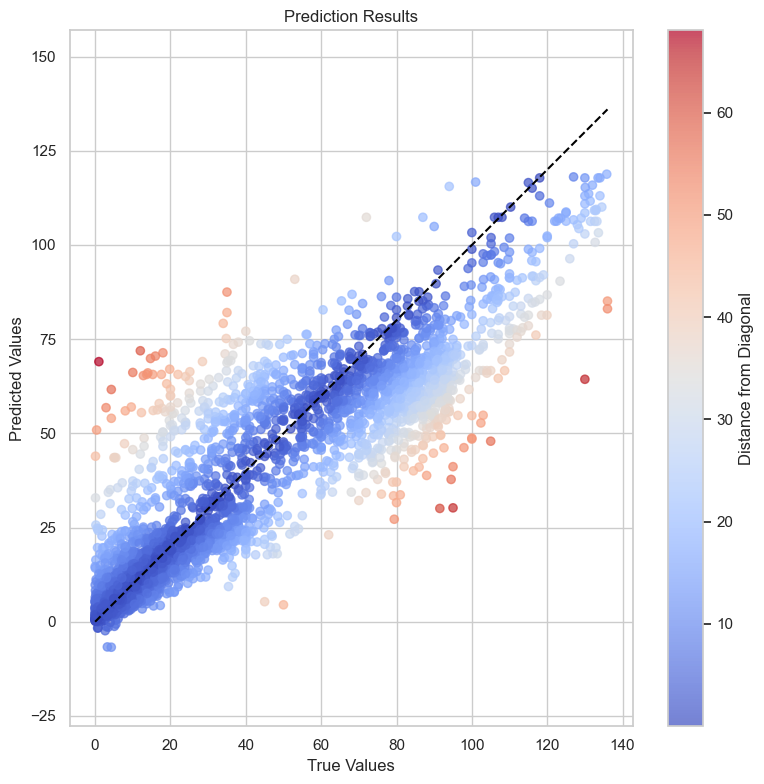

In [14]:
result_df['distance'] = np.abs(result_df['y_test_unsc'] - result_df['y_pred_unsc'])


plt.figure(figsize=(8, 8))
plt.scatter(result_df['y_test_unsc'], result_df['y_pred_unsc'], c=result_df['distance'], cmap='coolwarm', alpha=0.7)
plt.plot([min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         [min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         color='black', linestyle='--')
plt.colorbar(label='Distance from Diagonal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Results')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [83]:
param_space = {
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'depth': Integer(3, 10),
    'l2_leaf_reg': Real(1.0, 10.0, 'log-uniform'),
    'border_count': Integer(1, 100),
    'bagging_temperature': Real(0.1, 0.9),
    'min_data_in_leaf': Integer(5, 50),
    'grow_policy': Categorical(['SymmetricTree', 'Depthwise', 'Lossguide']),
}

# Create the CatBoostRegressor model
model = CatBoostRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=100, 
    scoring='neg_mean_squared_error',
    cv=10, 
    n_jobs=-1, 
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

0:	learn: 0.1792590	total: 68ms	remaining: 1m 7s
1:	learn: 0.1736309	total: 115ms	remaining: 57.2s
2:	learn: 0.1682637	total: 154ms	remaining: 51.3s
3:	learn: 0.1630520	total: 202ms	remaining: 50.4s
4:	learn: 0.1581833	total: 245ms	remaining: 48.7s
5:	learn: 0.1535589	total: 299ms	remaining: 49.5s
6:	learn: 0.1491299	total: 353ms	remaining: 50.1s
7:	learn: 0.1447595	total: 395ms	remaining: 49s
8:	learn: 0.1405328	total: 442ms	remaining: 48.7s
9:	learn: 0.1364377	total: 489ms	remaining: 48.4s
10:	learn: 0.1326949	total: 534ms	remaining: 48s
11:	learn: 0.1291955	total: 572ms	remaining: 47.1s
12:	learn: 0.1257022	total: 619ms	remaining: 47s
13:	learn: 0.1222948	total: 666ms	remaining: 46.9s
14:	learn: 0.1191331	total: 712ms	remaining: 46.7s
15:	learn: 0.1159840	total: 759ms	remaining: 46.7s
16:	learn: 0.1131110	total: 805ms	remaining: 46.5s
17:	learn: 0.1102468	total: 854ms	remaining: 46.6s
18:	learn: 0.1075182	total: 904ms	remaining: 46.7s
19:	learn: 0.1048487	total: 951ms	remaining: 46.

165:	learn: 0.0421373	total: 7.21s	remaining: 36.2s
166:	learn: 0.0420294	total: 7.26s	remaining: 36.2s
167:	learn: 0.0419781	total: 7.31s	remaining: 36.2s
168:	learn: 0.0419133	total: 7.35s	remaining: 36.2s
169:	learn: 0.0418618	total: 7.39s	remaining: 36.1s
170:	learn: 0.0417997	total: 7.43s	remaining: 36s
171:	learn: 0.0417010	total: 7.48s	remaining: 36s
172:	learn: 0.0416725	total: 7.5s	remaining: 35.9s
173:	learn: 0.0416080	total: 7.55s	remaining: 35.8s
174:	learn: 0.0415357	total: 7.58s	remaining: 35.7s
175:	learn: 0.0414807	total: 7.62s	remaining: 35.7s
176:	learn: 0.0414079	total: 7.67s	remaining: 35.7s
177:	learn: 0.0413910	total: 7.7s	remaining: 35.5s
178:	learn: 0.0413462	total: 7.73s	remaining: 35.4s
179:	learn: 0.0413129	total: 7.77s	remaining: 35.4s
180:	learn: 0.0412802	total: 7.8s	remaining: 35.3s
181:	learn: 0.0412527	total: 7.84s	remaining: 35.2s
182:	learn: 0.0412032	total: 7.87s	remaining: 35.1s
183:	learn: 0.0411259	total: 7.9s	remaining: 35s
184:	learn: 0.0410902	

332:	learn: 0.0349399	total: 12.3s	remaining: 24.6s
333:	learn: 0.0349106	total: 12.3s	remaining: 24.5s
334:	learn: 0.0348841	total: 12.3s	remaining: 24.5s
335:	learn: 0.0348654	total: 12.3s	remaining: 24.4s
336:	learn: 0.0348531	total: 12.4s	remaining: 24.3s
337:	learn: 0.0348349	total: 12.4s	remaining: 24.2s
338:	learn: 0.0348037	total: 12.4s	remaining: 24.2s
339:	learn: 0.0347686	total: 12.4s	remaining: 24.1s
340:	learn: 0.0347548	total: 12.4s	remaining: 24s
341:	learn: 0.0347417	total: 12.5s	remaining: 24s
342:	learn: 0.0347135	total: 12.5s	remaining: 23.9s
343:	learn: 0.0346870	total: 12.5s	remaining: 23.9s
344:	learn: 0.0346465	total: 12.5s	remaining: 23.8s
345:	learn: 0.0346328	total: 12.6s	remaining: 23.7s
346:	learn: 0.0345976	total: 12.6s	remaining: 23.7s
347:	learn: 0.0345736	total: 12.6s	remaining: 23.6s
348:	learn: 0.0345405	total: 12.6s	remaining: 23.6s
349:	learn: 0.0344973	total: 12.7s	remaining: 23.5s
350:	learn: 0.0344759	total: 12.7s	remaining: 23.5s
351:	learn: 0.03

498:	learn: 0.0314139	total: 16.2s	remaining: 16.3s
499:	learn: 0.0314025	total: 16.3s	remaining: 16.3s
500:	learn: 0.0313969	total: 16.3s	remaining: 16.2s
501:	learn: 0.0313746	total: 16.3s	remaining: 16.2s
502:	learn: 0.0313431	total: 16.3s	remaining: 16.2s
503:	learn: 0.0313197	total: 16.4s	remaining: 16.1s
504:	learn: 0.0313133	total: 16.4s	remaining: 16.1s
505:	learn: 0.0312920	total: 16.4s	remaining: 16s
506:	learn: 0.0312815	total: 16.5s	remaining: 16s
507:	learn: 0.0312744	total: 16.5s	remaining: 16s
508:	learn: 0.0312594	total: 16.5s	remaining: 15.9s
509:	learn: 0.0312455	total: 16.5s	remaining: 15.9s
510:	learn: 0.0312346	total: 16.5s	remaining: 15.8s
511:	learn: 0.0312051	total: 16.6s	remaining: 15.8s
512:	learn: 0.0312008	total: 16.6s	remaining: 15.7s
513:	learn: 0.0311779	total: 16.6s	remaining: 15.7s
514:	learn: 0.0311738	total: 16.6s	remaining: 15.7s
515:	learn: 0.0311409	total: 16.7s	remaining: 15.6s
516:	learn: 0.0311243	total: 16.7s	remaining: 15.6s
517:	learn: 0.0311

665:	learn: 0.0292467	total: 20.1s	remaining: 10.1s
666:	learn: 0.0292431	total: 20.1s	remaining: 10.1s
667:	learn: 0.0292411	total: 20.2s	remaining: 10s
668:	learn: 0.0292293	total: 20.2s	remaining: 9.99s
669:	learn: 0.0292133	total: 20.2s	remaining: 9.96s
670:	learn: 0.0292079	total: 20.2s	remaining: 9.92s
671:	learn: 0.0291827	total: 20.3s	remaining: 9.9s
672:	learn: 0.0291753	total: 20.3s	remaining: 9.86s
673:	learn: 0.0291652	total: 20.3s	remaining: 9.83s
674:	learn: 0.0291552	total: 20.3s	remaining: 9.79s
675:	learn: 0.0291382	total: 20.4s	remaining: 9.76s
676:	learn: 0.0291260	total: 20.4s	remaining: 9.73s
677:	learn: 0.0291154	total: 20.4s	remaining: 9.7s
678:	learn: 0.0290920	total: 20.4s	remaining: 9.67s
679:	learn: 0.0290876	total: 20.5s	remaining: 9.63s
680:	learn: 0.0290682	total: 20.5s	remaining: 9.6s
681:	learn: 0.0290549	total: 20.5s	remaining: 9.57s
682:	learn: 0.0290440	total: 20.6s	remaining: 9.54s
683:	learn: 0.0290388	total: 20.6s	remaining: 9.51s
684:	learn: 0.029

829:	learn: 0.0278293	total: 23.8s	remaining: 4.87s
830:	learn: 0.0278251	total: 23.8s	remaining: 4.84s
831:	learn: 0.0278198	total: 23.8s	remaining: 4.81s
832:	learn: 0.0278155	total: 23.9s	remaining: 4.78s
833:	learn: 0.0278005	total: 23.9s	remaining: 4.75s
834:	learn: 0.0277956	total: 23.9s	remaining: 4.72s
835:	learn: 0.0277925	total: 23.9s	remaining: 4.69s
836:	learn: 0.0277896	total: 23.9s	remaining: 4.66s
837:	learn: 0.0277838	total: 24s	remaining: 4.63s
838:	learn: 0.0277729	total: 24s	remaining: 4.6s
839:	learn: 0.0277662	total: 24s	remaining: 4.57s
840:	learn: 0.0277584	total: 24s	remaining: 4.54s
841:	learn: 0.0277565	total: 24s	remaining: 4.51s
842:	learn: 0.0277496	total: 24.1s	remaining: 4.48s
843:	learn: 0.0277440	total: 24.1s	remaining: 4.45s
844:	learn: 0.0277413	total: 24.1s	remaining: 4.42s
845:	learn: 0.0277356	total: 24.1s	remaining: 4.39s
846:	learn: 0.0277284	total: 24.1s	remaining: 4.36s
847:	learn: 0.0277229	total: 24.2s	remaining: 4.33s
848:	learn: 0.0277143	t

989:	learn: 0.0268644	total: 27.3s	remaining: 276ms
990:	learn: 0.0268601	total: 27.3s	remaining: 248ms
991:	learn: 0.0268509	total: 27.4s	remaining: 221ms
992:	learn: 0.0268464	total: 27.4s	remaining: 193ms
993:	learn: 0.0268401	total: 27.4s	remaining: 165ms
994:	learn: 0.0268379	total: 27.4s	remaining: 138ms
995:	learn: 0.0268362	total: 27.4s	remaining: 110ms
996:	learn: 0.0268341	total: 27.5s	remaining: 82.6ms
997:	learn: 0.0268262	total: 27.5s	remaining: 55.1ms
998:	learn: 0.0268234	total: 27.5s	remaining: 27.5ms
999:	learn: 0.0268139	total: 27.5s	remaining: 0us
Best hyperparameters: OrderedDict([('bagging_temperature', 0.5500427769575257), ('border_count', 100), ('depth', 10), ('grow_policy', 'Depthwise'), ('l2_leaf_reg', 1.1011374182579736), ('learning_rate', 0.040727555323979696), ('min_data_in_leaf', 41)])
Best MSE score: 0.0024938773729278165


In [84]:
best_hyperparameters = {
    'bagging_temperature': 0.5500427769575257,
    'border_count': 100,
    'depth': 10,
    'grow_policy': 'Depthwise',
    'l2_leaf_reg': 1.1011374182579736,
    'learning_rate': 0.040727555323979696,
    'min_data_in_leaf': 41,
}


model_3_tun_4 = CatBoostRegressor(
    bagging_temperature=best_hyperparameters['bagging_temperature'],
    border_count=best_hyperparameters['border_count'],
    depth=best_hyperparameters['depth'],
    grow_policy=best_hyperparameters['grow_policy'],
    l2_leaf_reg=best_hyperparameters['l2_leaf_reg'],
    learning_rate=best_hyperparameters['learning_rate'],
    min_data_in_leaf=best_hyperparameters['min_data_in_leaf'],
    random_state=42  
)


model_3_tun_4.fit(X_train_sc, y_train_sc)


y_pred_3_tun_4 = model_3_tun_4.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_4)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_4)
r2 = r2_score(y_test_sc, y_pred_3_tun_4)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_4)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1792590	total: 53.6ms	remaining: 53.5s
1:	learn: 0.1736309	total: 98.2ms	remaining: 49s
2:	learn: 0.1682637	total: 137ms	remaining: 45.5s
3:	learn: 0.1630520	total: 183ms	remaining: 45.5s
4:	learn: 0.1581833	total: 222ms	remaining: 44.3s
5:	learn: 0.1535589	total: 273ms	remaining: 45.3s
6:	learn: 0.1491299	total: 323ms	remaining: 45.9s
7:	learn: 0.1447595	total: 363ms	remaining: 45s
8:	learn: 0.1405328	total: 408ms	remaining: 44.9s
9:	learn: 0.1364377	total: 454ms	remaining: 44.9s
10:	learn: 0.1326949	total: 497ms	remaining: 44.7s
11:	learn: 0.1291955	total: 535ms	remaining: 44.1s
12:	learn: 0.1257022	total: 580ms	remaining: 44s
13:	learn: 0.1222948	total: 627ms	remaining: 44.2s
14:	learn: 0.1191331	total: 672ms	remaining: 44.1s
15:	learn: 0.1159840	total: 718ms	remaining: 44.1s
16:	learn: 0.1131110	total: 765ms	remaining: 44.2s
17:	learn: 0.1102468	total: 812ms	remaining: 44.3s
18:	learn: 0.1075182	total: 861ms	remaining: 44.5s
19:	learn: 0.1048487	total: 907ms	remaining: 

161:	learn: 0.0423529	total: 9.16s	remaining: 47.4s
162:	learn: 0.0423020	total: 9.2s	remaining: 47.2s
163:	learn: 0.0422670	total: 9.25s	remaining: 47.1s
164:	learn: 0.0422150	total: 9.29s	remaining: 47s
165:	learn: 0.0421373	total: 9.35s	remaining: 47s
166:	learn: 0.0420294	total: 9.42s	remaining: 47s
167:	learn: 0.0419781	total: 9.47s	remaining: 46.9s
168:	learn: 0.0419133	total: 9.53s	remaining: 46.9s
169:	learn: 0.0418618	total: 9.57s	remaining: 46.7s
170:	learn: 0.0417997	total: 9.62s	remaining: 46.6s
171:	learn: 0.0417010	total: 9.72s	remaining: 46.8s
172:	learn: 0.0416725	total: 9.75s	remaining: 46.6s
173:	learn: 0.0416080	total: 9.81s	remaining: 46.6s
174:	learn: 0.0415357	total: 9.85s	remaining: 46.4s
175:	learn: 0.0414807	total: 9.9s	remaining: 46.3s
176:	learn: 0.0414079	total: 9.96s	remaining: 46.3s
177:	learn: 0.0413910	total: 10s	remaining: 46.2s
178:	learn: 0.0413462	total: 10s	remaining: 46s
179:	learn: 0.0413129	total: 10.1s	remaining: 46s
180:	learn: 0.0412802	total:

324:	learn: 0.0351761	total: 15.4s	remaining: 32.1s
325:	learn: 0.0351416	total: 15.5s	remaining: 32s
326:	learn: 0.0351097	total: 15.5s	remaining: 31.9s
327:	learn: 0.0350656	total: 15.5s	remaining: 31.8s
328:	learn: 0.0350447	total: 15.6s	remaining: 31.7s
329:	learn: 0.0350219	total: 15.6s	remaining: 31.7s
330:	learn: 0.0349979	total: 15.6s	remaining: 31.6s
331:	learn: 0.0349760	total: 15.6s	remaining: 31.5s
332:	learn: 0.0349399	total: 15.7s	remaining: 31.4s
333:	learn: 0.0349106	total: 15.7s	remaining: 31.3s
334:	learn: 0.0348841	total: 15.7s	remaining: 31.2s
335:	learn: 0.0348654	total: 15.8s	remaining: 31.1s
336:	learn: 0.0348531	total: 15.8s	remaining: 31s
337:	learn: 0.0348349	total: 15.8s	remaining: 30.9s
338:	learn: 0.0348037	total: 15.8s	remaining: 30.9s
339:	learn: 0.0347686	total: 15.9s	remaining: 30.8s
340:	learn: 0.0347548	total: 15.9s	remaining: 30.7s
341:	learn: 0.0347417	total: 15.9s	remaining: 30.6s
342:	learn: 0.0347135	total: 15.9s	remaining: 30.5s
343:	learn: 0.03

489:	learn: 0.0315343	total: 20.4s	remaining: 21.2s
490:	learn: 0.0315290	total: 20.4s	remaining: 21.2s
491:	learn: 0.0315237	total: 20.5s	remaining: 21.1s
492:	learn: 0.0315001	total: 20.5s	remaining: 21.1s
493:	learn: 0.0314918	total: 20.5s	remaining: 21s
494:	learn: 0.0314878	total: 20.5s	remaining: 20.9s
495:	learn: 0.0314643	total: 20.6s	remaining: 20.9s
496:	learn: 0.0314595	total: 20.6s	remaining: 20.8s
497:	learn: 0.0314394	total: 20.6s	remaining: 20.8s
498:	learn: 0.0314139	total: 20.7s	remaining: 20.7s
499:	learn: 0.0314025	total: 20.7s	remaining: 20.7s
500:	learn: 0.0313969	total: 20.7s	remaining: 20.6s
501:	learn: 0.0313746	total: 20.7s	remaining: 20.6s
502:	learn: 0.0313431	total: 20.8s	remaining: 20.5s
503:	learn: 0.0313197	total: 20.8s	remaining: 20.5s
504:	learn: 0.0313133	total: 20.9s	remaining: 20.4s
505:	learn: 0.0312920	total: 20.9s	remaining: 20.4s
506:	learn: 0.0312815	total: 20.9s	remaining: 20.4s
507:	learn: 0.0312744	total: 21s	remaining: 20.3s
508:	learn: 0.03

654:	learn: 0.0293679	total: 25.3s	remaining: 13.3s
655:	learn: 0.0293632	total: 25.3s	remaining: 13.3s
656:	learn: 0.0293553	total: 25.4s	remaining: 13.2s
657:	learn: 0.0293416	total: 25.4s	remaining: 13.2s
658:	learn: 0.0293338	total: 25.4s	remaining: 13.2s
659:	learn: 0.0293098	total: 25.4s	remaining: 13.1s
660:	learn: 0.0293068	total: 25.5s	remaining: 13.1s
661:	learn: 0.0293010	total: 25.5s	remaining: 13s
662:	learn: 0.0292893	total: 25.5s	remaining: 13s
663:	learn: 0.0292711	total: 25.6s	remaining: 12.9s
664:	learn: 0.0292578	total: 25.6s	remaining: 12.9s
665:	learn: 0.0292467	total: 25.6s	remaining: 12.8s
666:	learn: 0.0292431	total: 25.6s	remaining: 12.8s
667:	learn: 0.0292411	total: 25.7s	remaining: 12.8s
668:	learn: 0.0292293	total: 25.7s	remaining: 12.7s
669:	learn: 0.0292133	total: 25.7s	remaining: 12.7s
670:	learn: 0.0292079	total: 25.8s	remaining: 12.6s
671:	learn: 0.0291827	total: 25.8s	remaining: 12.6s
672:	learn: 0.0291753	total: 25.8s	remaining: 12.6s
673:	learn: 0.02

819:	learn: 0.0279021	total: 30.1s	remaining: 6.61s
820:	learn: 0.0278963	total: 30.1s	remaining: 6.57s
821:	learn: 0.0278872	total: 30.2s	remaining: 6.53s
822:	learn: 0.0278805	total: 30.2s	remaining: 6.49s
823:	learn: 0.0278656	total: 30.2s	remaining: 6.46s
824:	learn: 0.0278572	total: 30.3s	remaining: 6.42s
825:	learn: 0.0278515	total: 30.3s	remaining: 6.38s
826:	learn: 0.0278442	total: 30.3s	remaining: 6.34s
827:	learn: 0.0278392	total: 30.3s	remaining: 6.3s
828:	learn: 0.0278346	total: 30.4s	remaining: 6.26s
829:	learn: 0.0278293	total: 30.4s	remaining: 6.22s
830:	learn: 0.0278251	total: 30.4s	remaining: 6.18s
831:	learn: 0.0278198	total: 30.4s	remaining: 6.15s
832:	learn: 0.0278155	total: 30.5s	remaining: 6.11s
833:	learn: 0.0278005	total: 30.5s	remaining: 6.07s
834:	learn: 0.0277956	total: 30.5s	remaining: 6.03s
835:	learn: 0.0277925	total: 30.6s	remaining: 6s
836:	learn: 0.0277896	total: 30.6s	remaining: 5.96s
837:	learn: 0.0277838	total: 30.6s	remaining: 5.92s
838:	learn: 0.02

981:	learn: 0.0269119	total: 34.7s	remaining: 636ms
982:	learn: 0.0269090	total: 34.7s	remaining: 600ms
983:	learn: 0.0269024	total: 34.7s	remaining: 565ms
984:	learn: 0.0269011	total: 34.8s	remaining: 529ms
985:	learn: 0.0268965	total: 34.8s	remaining: 494ms
986:	learn: 0.0268858	total: 34.8s	remaining: 459ms
987:	learn: 0.0268767	total: 34.8s	remaining: 423ms
988:	learn: 0.0268724	total: 34.9s	remaining: 388ms
989:	learn: 0.0268644	total: 34.9s	remaining: 353ms
990:	learn: 0.0268601	total: 34.9s	remaining: 317ms
991:	learn: 0.0268509	total: 35s	remaining: 282ms
992:	learn: 0.0268464	total: 35s	remaining: 247ms
993:	learn: 0.0268401	total: 35s	remaining: 211ms
994:	learn: 0.0268379	total: 35.1s	remaining: 176ms
995:	learn: 0.0268362	total: 35.1s	remaining: 141ms
996:	learn: 0.0268341	total: 35.1s	remaining: 106ms
997:	learn: 0.0268262	total: 35.1s	remaining: 70.4ms
998:	learn: 0.0268234	total: 35.2s	remaining: 35.2ms
999:	learn: 0.0268139	total: 35.2s	remaining: 0us
Mean Squared Error

# Results

In [15]:
data = {
    'Model': ['RandomForest', 'RandomForest', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'CatBoost', 'CatBoost', 'CatBoost', 'CatBoost', 'CatBoost'],
    'Tuning': ['Before Tuning', 'After SKOPT Tuning', 'Before Tuning', 'After Skopt Tuning (200 iterations, 10 CV)', 'After Skopt Tuning (50 iterations, 5 CV)', 'After Hyperopt Tuning (100 iterations)', 'After Hyperopt Tuning (50 iterations)', 'Before Tuning', 'After Skopt Tuning (50 iterations, 5 CV)', 'After Skopt Tuning (100 iterations, 10 CV)', 'After Hyperopt Tuning (100 iterations)', 'After Hyperopt Tuning (50 iterations)'],
    'MSE': [0.0068, 0.0074, 0.0062, 0.0074, 0.0066, 0.0074, 0.0060, 0.0057, 0.0066, 0.0070, 0.0050, 0.0067],
    'MAE': [0.0572, 0.0572, 0.0537, 0.0588, 0.0547, 0.0588, 0.0523, 0.0514, 0.0550, 0.0565, 0.0469, 0.0550],
    'R2': [0.8023, 0.7844, 0.8187, 0.7844, 0.8087, 0.8249, 0.8322, 0.8090, 0.7968, 0.7968, 0.8534, 0.8048],
    'MAPE': [10.0847, 7.0695, 8.0895, 7.0695, 9.1101, 9.5192, 10.8741, 6.0607, 6.2641, 5.8281, 5.8281, 7.7402]
}

df = pd.DataFrame(data)
df

,Model,Tuning,MSE,MAE,R2,MAPE
0,RandomForest,Before Tuning,0.0068,0.0572,0.8023,10.0847
1,RandomForest,After SKOPT Tuning,0.0074,0.0572,0.7844,7.0695
2,XGBoost,Before Tuning,0.0062,0.0537,0.8187,8.0895
3,XGBoost,"After Skopt Tuning (200 iterations, 10 CV)",0.0074,0.0588,0.7844,7.0695
4,XGBoost,"After Skopt Tuning (50 iterations, 5 CV)",0.0066,0.0547,0.8087,9.1101
5,XGBoost,After Hyperopt Tuning (100 iterations),0.0074,0.0588,0.8249,9.5192
6,XGBoost,After Hyperopt Tuning (50 iterations),0.0060,0.0523,0.8322,10.8741
7,CatBoost,Before Tuning,0.0057,0.0514,0.8090,6.0607
8,CatBoost,"After Skopt Tuning (50 iterations, 5 CV)",0.0066,0.0550,0.7968,6.2641
9,CatBoost,"After Skopt Tuning (100 iterations, 10 CV)",0.0070,0.0565,0.7968,5.8281


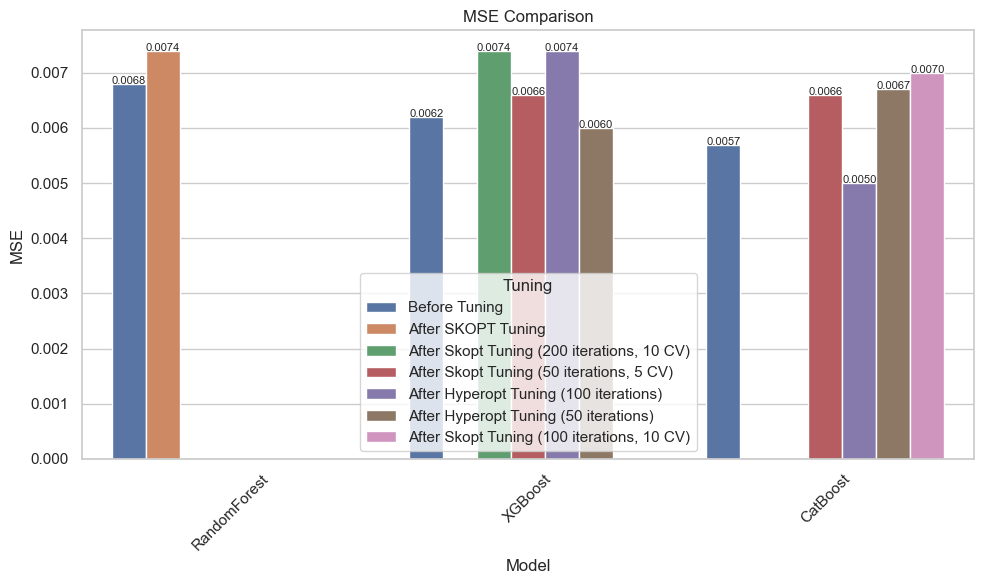

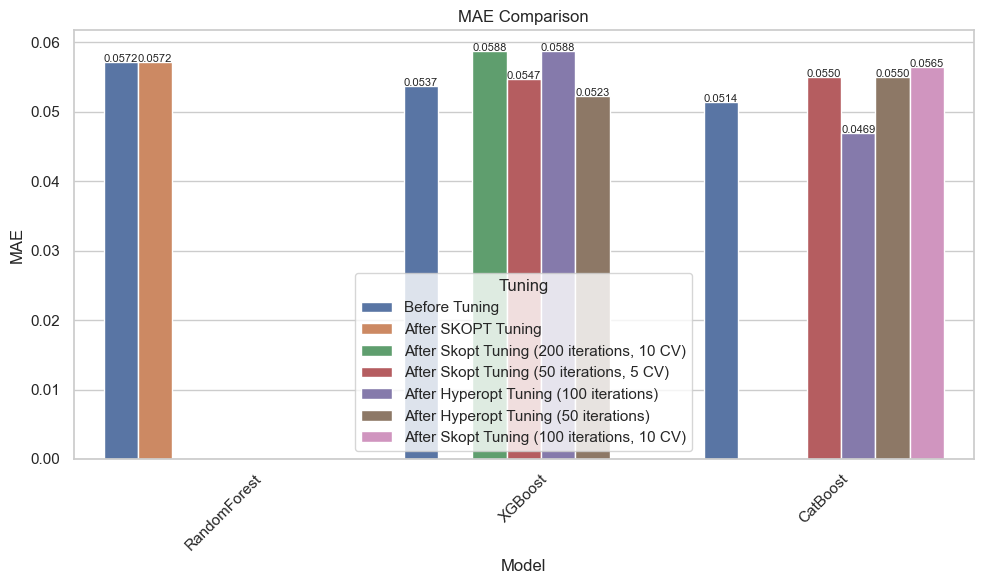

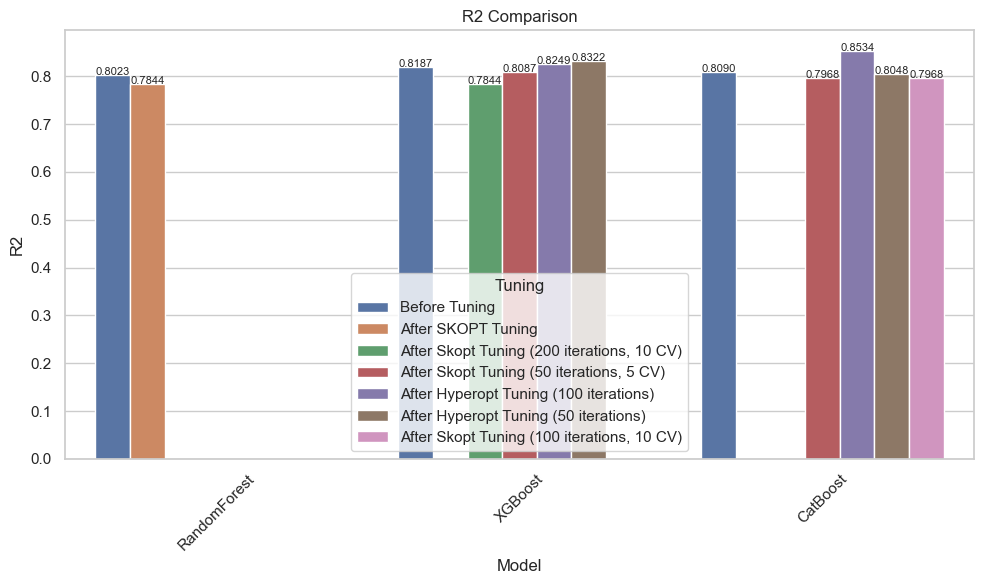

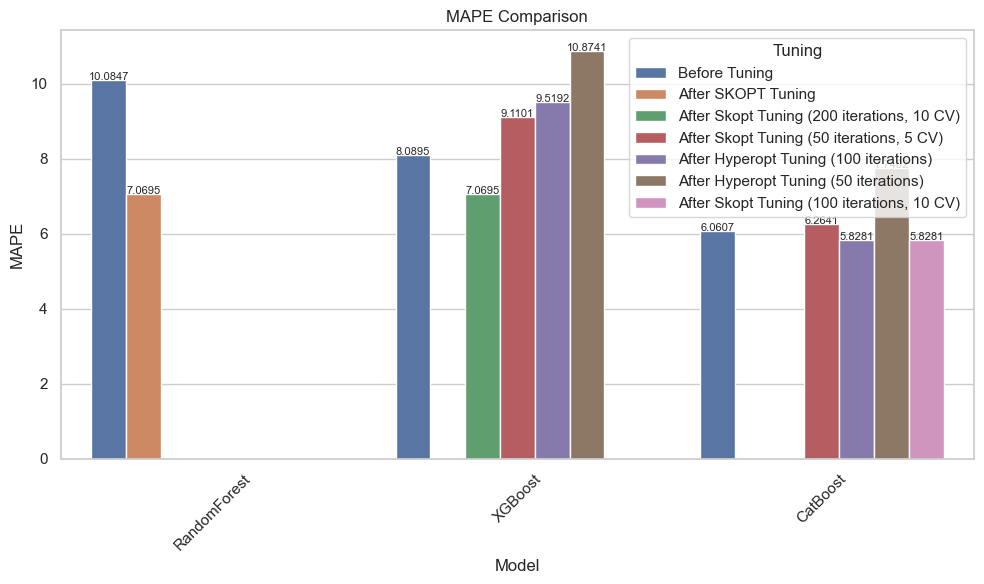

In [16]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MSE', hue='Tuning', data=df)
plt.title('MSE Comparison')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8) 

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MAE', hue='Tuning', data=df)
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)  
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='R2', hue='Tuning', data=df)
plt.title('R2 Comparison')
plt.ylabel('R2')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)  

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MAPE', hue='Tuning', data=df)
plt.title('MAPE Comparison')
plt.ylabel('MAPE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)  
plt.tight_layout()
plt.show()